In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *
from matplotlib.widgets import Cursor, Button

#My image
file_path = '../Dropbox Files/hel1.pma'
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
avg_frame_data = avg_frame_arr(file_path)

#Chanel arrays
avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]

#Chanel image paths
CH1_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

#Chanel images
image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

Image Size: 512 x 512
Sucessfully generated average frame


Number of peaks identified in CH1: 57
Number of peaks identified in CH2: 68


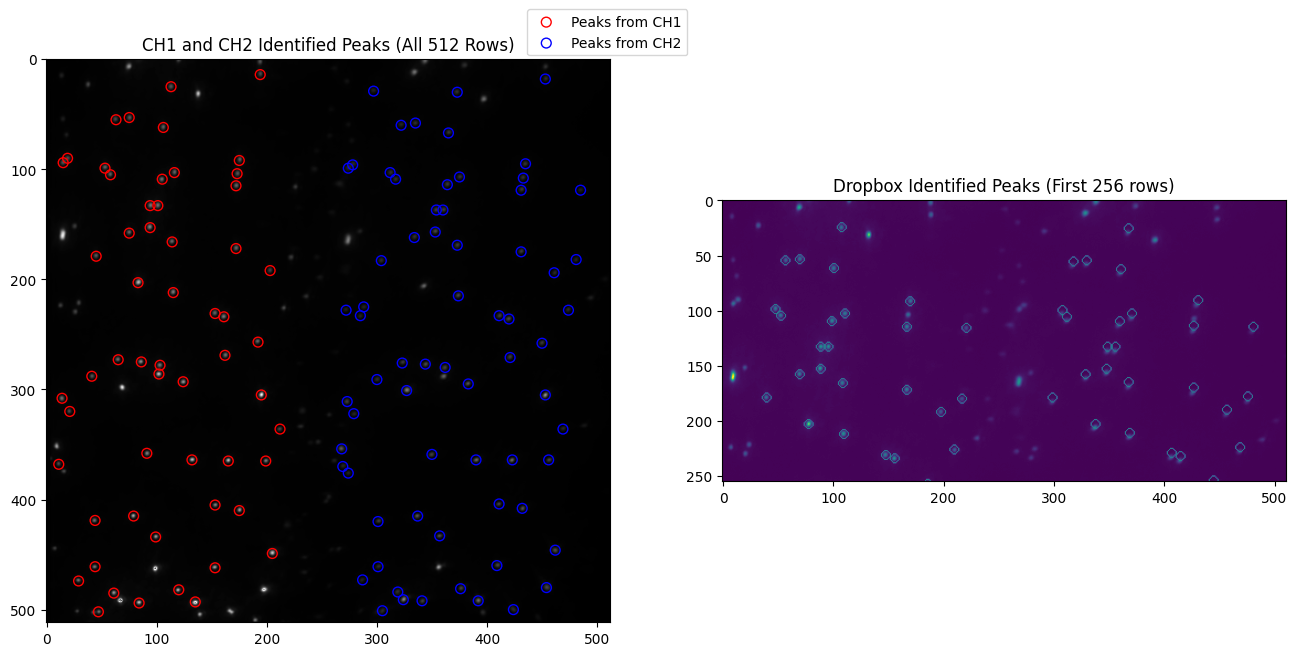

In [2]:
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2_new = find_peaks_scipy_IDL(CH2_img_path, sigma=2, block_size=16, scaler_percent=10)[0]

good_peaks_1,_ = good_peak_finder_CH1(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder_CH2(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks_CH(good_peaks_1)
good_peaks_2_CH2 = shift_peaks_CH(good_peaks_2_new)

#All in one image!
print(f"Number of peaks identified in CH1: {len(good_peaks_1)}")
print(f"Number of peaks identified in CH2: {len(good_peaks_2_CH2)}")

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks (All 512 Rows)")
axes[0].imshow(image, cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))

axes[1].set_title("Dropbox Identified Peaks (First 256 rows)")
axes[1].imshow(hel1_ave_image)
plt.show()

# Mapping Function
#### Example Pairs
CH1_Peak50 (x,y):(194,14)
CH2_Peak50 (x,y):(453,18)
CH1_Peak44 (x,y):(45,179)
CH2_Peak47 (x,y):(304,183)
CH1_Peak27 (x,y):(44,419)
CH2_Peak32 (x,y):(301,420)

In [3]:
map_array = [(194,14), (453,18), (45,179), (304,183), (44, 419), (301, 420)]
map_array = np.array(map_array)
print(map_array)


[[194  14]
 [453  18]
 [ 45 179]
 [304 183]
 [ 44 419]
 [301 420]]


In [4]:
# np.polynomial.polynomial.Polynomial.mapparms()


In [5]:
# # Average frame, CH1 and CH2 overlayed
# avg_overlayed = ((avg_frame_data_CH1 + avg_frame_data_CH2) / 2).astype(np.uint8)
# Overlay_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_Overlay.png"
# overlay_img = io.imread(Overlay_img_path)

# #Dropbox path
# average_path_DB = "../Dropbox Files/hel1_ave_merged.tif"
# average_DB_image = io.imread(average_path_DB)

# f, axes = plt.subplots(1, 2, figsize=(16, 24))

# axes[0].imshow(overlay_img, cmap="gray")
# axes[1].imshow(average_DB_image, cmap="gray")
# plt.show();


In [6]:
# #Dropbox path to Top half of merged image circled!
# average_circ_path_DB = "../Dropbox Files/hel1_ave_Merg_Circ.tif"
# average_circ_DB_image = io.imread(average_circ_path_DB)
# plt.imshow(average_circ_DB_image)
# plt.show();